Guides on how to use Kaggle datasets.

In [2]:
import os
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# authenticate Kaggle. Need to `~/.kaggle/kaggle.json`
api = KaggleApi()
api.authenticate()

In [3]:
# inspect and download Kaggle datasets.
# looking at
# https://www.kaggle.com/datasets/muthuj7/weather-dataset
print("Current working directory" ,os.path.abspath(os.getcwd()))
weather_dataset = "muthuj7/weather-dataset"
print("Files in weather dataset", api.dataset_list_files(weather_dataset).files)

"""Both options require unzipping the file after..
api.dataset_download_files("muthuj7/weather-dataset", path="../data")
api.dataset_download_file("muthuj7/weather-dataset", "weatherHistory.csv", path="../data")
May as well do
kaggle datasets list -s [KEYWORD]
kaggle datasets download -d [DATASET]
"""; None

Current working directory /home/fireofearth/code/document/python
Files in weather dataset [weatherHistory.csv]


In [3]:
# load the CSV as a Pandas DataFrame
weather_csvfile = "../data/weatherHistory.csv"
weather_df = pd.read_csv(weather_csvfile)

# the CSV is not ordered! Convert to datatime format and sort
weather_df["Formatted Date"] = pd.to_datetime(weather_df["Formatted Date"])
weather_df.sort_values(by=["Formatted Date"], inplace=True)

weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2880,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 03:00:00+01:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


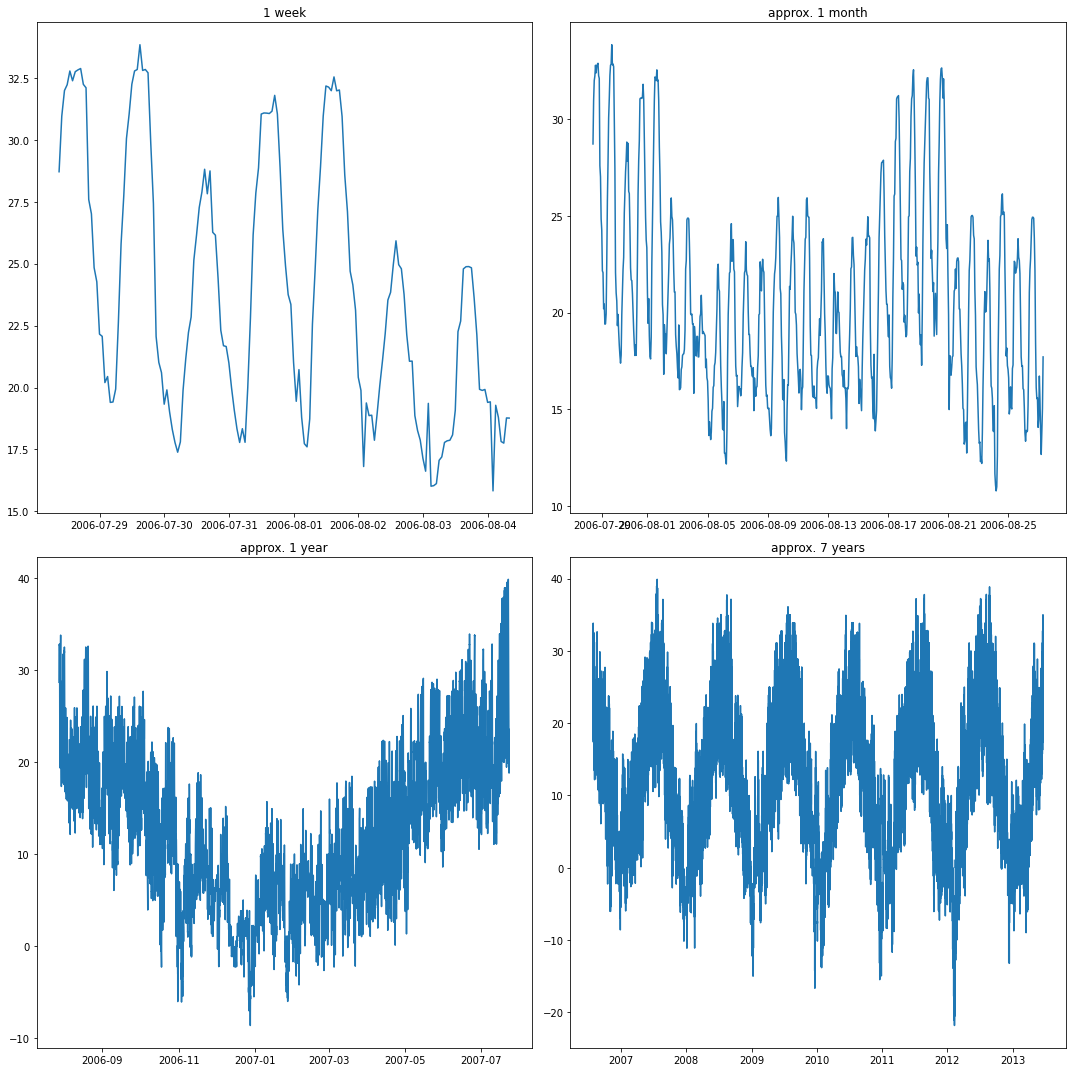

In [4]:
N = 5000

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)

_slice = slice(N, N + 7*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
ax.plot(datetime, temperature, label="temp C")
ax.set_title("1 week")

ax = fig.add_subplot(222)
_slice = slice(N, N + 30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
ax.plot(datetime, temperature, label="temp C")
ax.set_title("approx. 1 month")

ax = fig.add_subplot(223)
_slice = slice(N, N + 12*30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
ax.plot(datetime, temperature, label="temp C")
ax.set_title("approx. 1 year")

ax = fig.add_subplot(224)
_slice = slice(N, N + 7*12*30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
ax.plot(datetime, temperature, label="temp C")
ax.set_title("approx. 7 years")

fig.tight_layout()